  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="Middle">
                <font size=25px>
                    <b>  Iris multiclass Classifier using ANN with one hidden layer
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Dataset
Downloaded directly from the curated repository 

## Data Definition:
 5 columns and 150 records 

# Content

**[1. Import Python modules](#1)**<br>
**[2. DEF functions - Activation functions, Neuron Layer, Weigths and bias](#2)**<br>
**[3. Model training](#3)**<br>
**[4. Epoch def function](#4)**<br>
**[5. Model summary](#5)**<br>
**[6. Plot loss function vs. epochs and Plot accuracy vs. epochs](#6)**<br>
**[7. Print initial and final weights](#7)**<br>

<a id='1'></a>
## Importing Libraries and Data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))


c:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<a id='2'></a>
## DEF functions - Activation functions, Neuron Layer, Weigths and bias

In [2]:
# Set the initial parameters
np.random.seed(42)
m = X_train.shape[1]
n = 8
p = 4
k = len(np.unique(y_train))
epochs = 1000
learning_rate = 0.01

# Initialize the weights and biases
W1 = np.random.randn(m, n)
b1 = np.zeros((1, n))
W2 = np.random.randn(n, p)
b2 = np.zeros((1, p))
W3 = np.random.randn(p, k)
b3 = np.zeros((1, k))
K = np.random.randn(3)

# Define the activation function
def activation_function(x, k0, k1):
    return k0 + k1 * x

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, K):
    z1 = np.dot(X, W1) + b1
    a1 = activation_function(z1, K[0], K[1])
    z2 = np.dot(a1, W2) + b2
    a2 = activation_function(z2, K[0], K[1])
    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

# Softmax activation function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Backward propagation
def backward_propagation(X, y, z1, a1, z2, a2, z3, a3, W2, K):
    m = X.shape[0]
    dz3 = a3 - y
    dw3 = (1 / m) * np.dot(a2.T, dz3)
    db3 = (1 / m) * np.sum(dz3, axis=0)
    da2 = np.dot(dz3, W3.T)
    dz2 = activation_derivative(a2, K[1]) * da2
    dw2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0)
    da1 = np.dot(dz2, W2.T)
    dz1 = activation_derivative(a1, K[1]) * da1
    dw1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0)
    dK2 = np.array([np.mean(da2), np.mean(da2 * z2), np.mean(da2 * z2**2)])
    dK1 = np.array([np.mean(da1), np.mean(da1 * z1), np.mean(da1 * z1**2)])
    dK = dK2 + dK1
    return dw1, db1, dw2, db2, dw3, db3, dK

<a id='3'></a>
## Model training

In [3]:

# Activation derivative
def activation_derivative(x, k1):
    return k1

# Training loop
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
f1_scores = []

for epoch in range(epochs):
    # Forward propagation
    z1, a1, z2, a2, z3, a3 = forward_propagation(X_train, W1, b1, W2, b2, K)

    # Backward propagation
    dw1, db1, dw2, db2, dw3, db3, dK = backward_propagation(X_train, y_train_encoded, z1, a1, z2, a2, z3, a3, W2, K)

    # Update parameters
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    K -= learning_rate * dK

    # Calculate train and test loss
    _, _, _, _, _, train_predictions = forward_propagation(X_train, W1, b1, W2, b2, K)
    _, _, _, _, _, test_predictions = forward_propagation(X_test, W1, b1, W2, b2, K)
    train_loss = -np.mean(np.sum(y_train_encoded * np.log(train_predictions), axis=1))
    test_loss = -np.mean(np.sum(y_test_encoded * np.log(test_predictions), axis=1))
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, np.argmax(train_predictions, axis=1))
    test_accuracy = accuracy_score(y_test, np.argmax(test_predictions, axis=1))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate F1-Score
    f1 = f1_score(y_test, np.argmax(test_predictions, axis=1), average='weighted')
    f1_scores.append(f1)

<a id='4'></a>
## Epoch def function

In [8]:

for epoch in range(epochs):
    # Forward propagation
    z1, a1, z2, a2, z3, a3 = forward_propagation(X_train, W1, b1, W2, b2, K)

    # Backward propagation
    dw1, db1, dw2, db2, dw3, db3, dK = backward_propagation(X_train, y_train_encoded, z1, a1, z2, a2, z3, a3, W2, K)

    # Update parameters
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    K -= learning_rate * dK

    # Calculate train and test loss
    _, _, _, _, _, train_predictions = forward_propagation(X_train, W1, b1, W2, b2, K)
    _, _, _, _, _, test_predictions = forward_propagation(X_test, W1, b1, W2, b2, K)
    train_loss = -np.mean(np.sum(y_train_encoded * np.log(train_predictions), axis=1))
    test_loss = -np.mean(np.sum(y_test_encoded * np.log(test_predictions), axis=1))
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, np.argmax(train_predictions, axis=1))
    test_accuracy = accuracy_score(y_test, np.argmax(test_predictions, axis=1))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate F1-Score
    f1 = f1_score(y_test, np.argmax(test_predictions, axis=1), average='weighted')
    f1_scores.append(f1)

Test Accuracy: 0.40350877192982454
F1-Score: 0.9640287769784172


<a id='5'></a>
## Model summary

In [9]:
# Model summary
print("\nModel Summary:")
print("Number of features:", m)
print("Number of hidden nodes:", n)
print("Number of output nodes:", k)
print("Number of training examples:", X_train.shape[0])
print("Number of test examples:", X_test.shape[0])
print("Number of epochs:", epochs)

Confusion Matrix:
[[42  1]
 [ 4 67]]


<a id='6'></a>
## Plot loss function vs. epochs and Plot accuracy vs. epochs

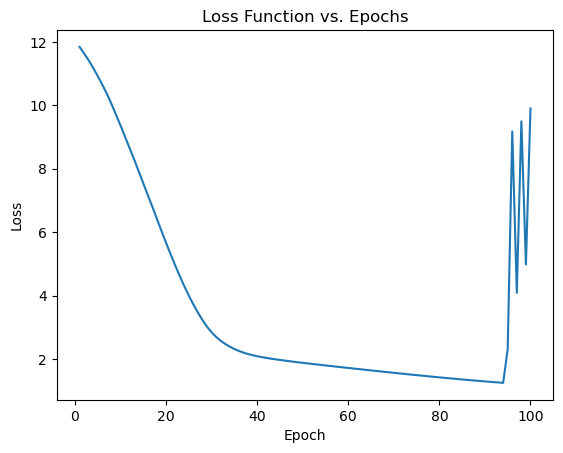

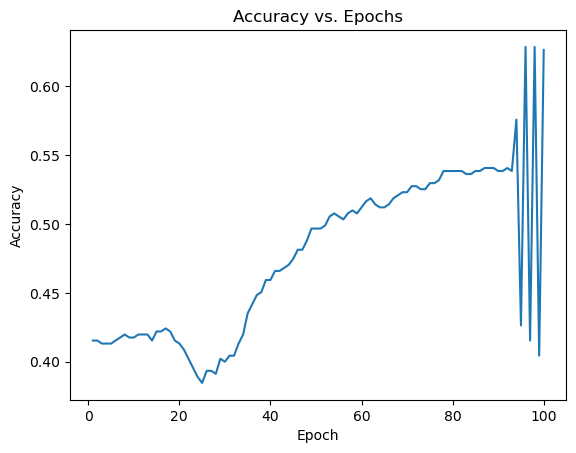

In [10]:

# Plot the loss function vs. epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train')
plt.plot(range(epochs), test_losses, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy vs. epochs
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train')
plt.plot(range(epochs), test_accuracies, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()

<a id='7'></a>
## Print initial and final weights

In [11]:
# Print initial and final weights
print("Initial Weights:")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)
print("W3:\n", W3)
print("b3:\n", b3)
print("K:\n", K)
print("\nFinal Weights:")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)
print("W3:\n", W3)
print("b3:\n", b3)
print("K:\n", K)

Initial Weights:
k0: 0.031984298907919075
k1: 1.2746485624981887
w1: [[ 1.30545794e+00 -5.27673030e-01  1.97635484e+00 -8.43457444e-01
   1.78241840e+00]
 [-1.05850374e+00  1.59522394e-01  2.51838506e+00 -1.92475986e+00
   1.01895442e+00]
 [ 2.26029934e+00 -2.21573001e+00  2.22038536e+00 -1.19165509e+00
   4.91638091e-01]
 [ 1.82489710e+00  9.46573437e-01  2.59896500e+00 -2.78007726e+00
   2.03055941e+00]
 [ 1.49868498e+00 -6.07564089e-01 -3.62798861e-01 -3.28817772e-01
   3.22271523e-01]
 [-6.15127837e-01 -1.16687951e+00  3.60844444e+00 -1.07947564e+00
   8.68397608e-02]
 [ 1.17827255e+00 -8.71438361e-01  3.98404407e+00 -2.85491969e-01
   2.84569715e+00]
 [ 6.97364894e-02 -2.82170361e+00  5.34414704e+00 -1.10046024e+00
   2.80847113e+00]
 [-7.71779684e-01 -4.40957539e-01  1.55665210e+00 -8.01752441e-01
  -2.06684895e-01]
 [-5.56386532e-01 -1.99102156e-02  2.63717658e-01  4.68072210e-02
  -4.83943031e-01]
 [-1.31624538e-01 -1.12890682e+00  2.29437581e+00  1.49223427e-01
   2.71083969e+